This data looked interesting to me. I am going to focus on my home state of colorado and see what we find. The data is 1.88 million US wild fires from 1992-2015.


Data: Short, Karen C. 2017. Spatial wildfire occurrence data for the United States, 1992-2015 [FPA_FOD_20170508]. 4th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.4

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#connecting to the database and selecting the fire table
db = sqlite3.connect('fire.sqlite')

df = pd.read_sql_query("SELECT * FROM Fires", db)


In [8]:
# Selecting colorado and saving to cvs
codf = df[df.STATE == 'CO']
codf.to_csv('../fire/codf.csv', index = False)

In [9]:
codf = pd.read_csv('../fire/codf.csv')

C:\Users\mattl\ANACONDA1\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
codf.head();

In [12]:
codf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34157 entries, 0 to 34156
Data columns (total 39 columns):
OBJECTID                      34157 non-null int64
FOD_ID                        34157 non-null int64
FPA_ID                        34157 non-null object
SOURCE_SYSTEM_TYPE            34157 non-null object
SOURCE_SYSTEM                 34157 non-null object
NWCG_REPORTING_AGENCY         34157 non-null object
NWCG_REPORTING_UNIT_ID        34157 non-null object
NWCG_REPORTING_UNIT_NAME      34157 non-null object
SOURCE_REPORTING_UNIT         34157 non-null object
SOURCE_REPORTING_UNIT_NAME    34157 non-null object
LOCAL_FIRE_REPORT_ID          12602 non-null float64
LOCAL_INCIDENT_ID             12662 non-null object
FIRE_CODE                     19094 non-null object
FIRE_NAME                     27012 non-null object
ICS_209_INCIDENT_NUMBER       595 non-null object
ICS_209_NAME                  595 non-null object
MTBS_ID                       205 non-null object
MTBS_FIRE_NAME

In [28]:

%matplotlib inline

In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(codf)

Number of variables,39
Number of observations,34157
Total Missing (%),21.7%
Total size in memory,10.2 MiB
Average record size in memory,312.0 B
Numeric,13
Categorical,21
Boolean,0
Date,0
Text (Unique),1
Rejected,4


I am going to plot the fires based on size classification, not total size. This is so the largest fires do not dominate the map and we can still get a feel for the distribution.

Changing Size classification to numeric

In [16]:
size_num = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

In [14]:
mapdata = codf[['LATITUDE','LONGITUDE', 'FIRE_SIZE_CLASS']]


In [17]:
mapdata.FIRE_SIZE_CLASS = mapdata.FIRE_SIZE_CLASS.map(size_num)


C:\Users\mattl\ANACONDA1\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
import folium

In [19]:
mapdata.head()

,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
0,39.292222,-105.183056,2
1,38.913333,-105.983611,1
2,39.100278,-106.367500,1
3,37.345000,-102.805833,3
4,38.891111,-105.431944,2


In [36]:
mapdata=mapdata[pd.notnull(mapdata['FIRE_SIZE_CLASS'])]

In [21]:
#folium geographic basemap
def generateBaseMap(default_location=[39, -105], default_zoom_start=7):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [22]:
basemap = generateBaseMap()


In [23]:
mapdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34157 entries, 0 to 34156
Data columns (total 3 columns):
LATITUDE           34157 non-null float64
LONGITUDE          34157 non-null float64
FIRE_SIZE_CLASS    34157 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.0 MB


In [24]:
from folium.plugins import HeatMap

base_map = generateBaseMap()
HeatMap(data=mapdata, radius=8, max_zoom=13).add_to(base_map)
base_map.save('comap.html')
base_map

Hypothisis: The high concentration of front range fires are due to human activity

In [25]:
#Rectangle around the front range 


a1 = 38.61286
a2 = 40.596790
b1 = -105.552250
b2 = -104.638888


fr_bound=[(a1, b1),(a2, b1),(a2, b2),(a1, b2),(a1, b1)]

In [26]:
loc_map = generateBaseMap()
HeatMap(data=mapdata, radius=8, max_zoom=13).add_to(loc_map)
folium.PolyLine(fr_bound, color = 'red').add_to(loc_map)
#base_map.save('comap.html')

                 
loc_map

In [27]:
frdf1 = codf[(codf.LATITUDE>a1) & (codf.LATITUDE<a2)]
frdf = frdf1[(codf.LONGITUDE>b1) & (codf.LONGITUDE<b2)]


C:\Users\mattl\ANACONDA1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [29]:
frdata = frdf[['LATITUDE','LONGITUDE']]

fr_map = generateBaseMap()
HeatMap(data=frdata, radius=8, max_zoom=13).add_to(fr_map)
folium.PolyLine(fr_bound, color = 'red').add_to(fr_map)
fr_map

In [37]:
frdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6438 entries, 0 to 34147
Data columns (total 39 columns):
OBJECTID                      6438 non-null int64
FOD_ID                        6438 non-null int64
FPA_ID                        6438 non-null object
SOURCE_SYSTEM_TYPE            6438 non-null object
SOURCE_SYSTEM                 6438 non-null object
NWCG_REPORTING_AGENCY         6438 non-null object
NWCG_REPORTING_UNIT_ID        6438 non-null object
NWCG_REPORTING_UNIT_NAME      6438 non-null object
SOURCE_REPORTING_UNIT         6438 non-null object
SOURCE_REPORTING_UNIT_NAME    6438 non-null object
LOCAL_FIRE_REPORT_ID          2134 non-null float64
LOCAL_INCIDENT_ID             4982 non-null object
FIRE_CODE                     1676 non-null object
FIRE_NAME                     3510 non-null object
ICS_209_INCIDENT_NUMBER       49 non-null object
ICS_209_NAME                  49 non-null object
MTBS_ID                       24 non-null object
MTBS_FIRE_NAME                24

Combining and comparing the causes of fires in the front range and Colorado as a whole

In [31]:
frcause = frdf.STAT_CAUSE_DESCR.value_counts()/6438


In [32]:
cocause = codf.STAT_CAUSE_DESCR.value_counts()/34157

In [33]:
totcause = pd.concat([cocause, frcause], axis=1, sort = True)
totcause.columns = ['CO','FR']
totcause.head()

,CO,FR
Arson,0.024709,0.055141
Campfire,0.086454,0.090867
Children,0.006090,0.009475
Debris Burning,0.020728,0.015222
Equipment Use,0.016014,0.023920


In [34]:
#github: hobson

def overlapped_bar(df, show=False, width=.5, alpha=0.5, 
                   title='', xlabel='', ylabel='', **plot_kwargs):
    """Like a stacked bar chart except bars on top of each other with transparency"""
    xlabel = xlabel or df.index.name
    plt.figure(figsize = (15,5))
    N = len(df)
    M = len(df.columns)
    indices = np.arange(N)
    colors = ['steelblue', 'firebrick', 'darksage', 'goldenrod', 'gray'] * int(M / 5. + 1)
    for i, label, color in zip(range(M), df.columns, colors):
        kwargs = plot_kwargs
        kwargs.update({'color': color, 'label': label})
        plt.bar(indices, df[label], width=width, alpha=alpha if i else 1, **kwargs)
        plt.xticks(indices+ width-0.5,
                   ['{}'.format(idx) for idx in df.index.values])
    plt.legend()
    
   
    plt.title(title)
    plt.xlabel(xlabel)
    if show:
        plt.show()
    return plt.gcf()

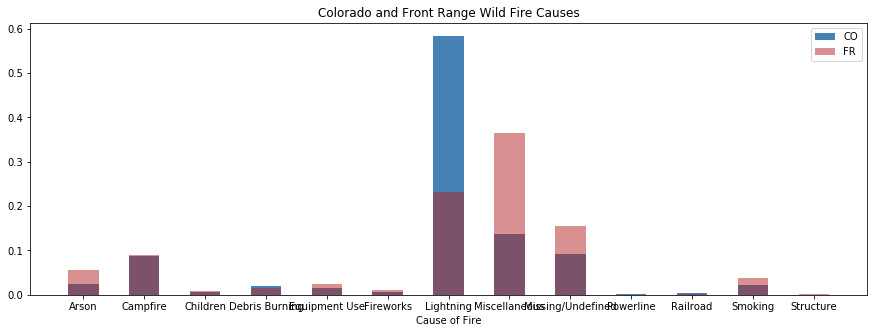

In [35]:
title = 'Colorado and Front Range Wild Fire Causes'
xlabel = 'Cause of Fire'
ylabel = 'Percent of Total Fires'


overlapped_bar(totcause,title= title,xlabel= xlabel,ylabel = ylabel);

While lightning still dominates in the front range, miscellaneous and missing/undefined are much higher in the front range. Smoking, Arson, Children and Equipment Use are higher in the front range than colorado as a whole. 